In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [0]:
tsv_file='36151-0003-Data.tsv'
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('eligible_women.csv',index=False)

C:\Users\vkhanna\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (15,16,17,18,19,20,21,28,29,30,31,32,33,34,35,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,62,63,65,66,68,78,79,80,81,82,84,85,86,87,88,89,91,99,100,101,102,105,106,107,108,109,110,113,114,115,116,119,134,135,139,140,145,157,158,161,162,163,164,165,166,167,168,170,171,172,173,174,179,180,181,191,192,193,194,195,196,197,202,203,209,213,217,218,219,220,221,223,224,225,226,227,228,229,232,233,234,235,236,237,248,249,250,251,252,253,254,255,256,257,258,259,260,261,278,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,453,454,458,459,460,461,468,476,510,511,512,513,515) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
format_df = pd.read_csv("cleaned_data.csv",index_col=0)

In [0]:
def get_clean_data(file_name):
  df = pd.read_csv(file_name, sep='\t', engine='python')

  # Replace the empty values by NaN value
  df = df.replace(r'^\s*$', np.nan, regex=True)

  # Find the number of valid values for each column
  counts = df.count().to_frame('count')
  print("NUmber of columns in the given data = ", counts.shape[0])

  # Select the columns that have 3/4 th values as valid
  filter_columns_df = counts.loc[counts['count']>=int(df.shape[0]*0.70)]
  filter_columns_list = filter_columns_df.index.tolist()
  print("Number of columns chosen for analysis = ", filter_columns_df.shape[0])

  # Drop the remaining columns from data frame
  df = df[filter_columns_list]
  return df

In [0]:
def format_data(format_df):
  dataframe = format_df.copy()
  if 'EW6' in dataframe.columns:
    bins= [0, 18, 30, 40, 60, 150]
    labels = [1, 2, 3, 4, 5]
    dataframe['EW6'] = pd.cut(dataframe['EW6'], bins=bins, labels=labels, right=False)
    dataframe.head()

  if 'EW8' in dataframe.columns:
    dataframe['EW8'].fillna(0, inplace=True)
    dataframe['EW8'] = dataframe['EW8'].astype(int)
    dataframe.loc[dataframe['EW8'].between(1,9), 'EW8'] = 1
    dataframe.loc[dataframe['EW8'].between(10,12), 'EW8'] = 2
    dataframe.loc[dataframe['EW8'].between(13,16), 'EW8'] = 3

  if 'EW15A' in dataframe.columns:
    dataframe['EW15A'].fillna(0, inplace=True)
    dataframe['EW15A'] = dataframe['EW15A'].astype(int)
    dataframe.loc[dataframe['EW15A'].between(1,10), 'EW15A'] = 1
    dataframe.loc[dataframe['EW15A'].between(11,12), 'EW15A'] = 2
    dataframe.loc[dataframe['EW15A'].between(13,14), 'EW15A'] = 3

  if 'EW15B' in dataframe.columns:
    dataframe['EW15B'].fillna(0, inplace=True)
    dataframe['EW15B'] = dataframe['EW15B'].astype(int)
    dataframe.loc[dataframe['EW15B'].between(1,10), 'EW15B'] = 1
    dataframe.loc[dataframe['EW15B'].between(11,12), 'EW15B'] = 2
    dataframe.loc[dataframe['EW15B'].between(13,14), 'EW15B'] = 3

  if 'MH1A' in dataframe.columns:
    bins= [1, 18, 20, 30, 40, 60]
    labels = [1, 2, 3, 4, 5]     
    dataframe['MH1A'].fillna(0, inplace=True)
    dataframe['MH1A'] = dataframe['MH1A'].astype(int)
    dataframe['MH1A'] = pd.cut(dataframe['MH1A'], bins=bins, labels=labels, right=False)

  if 'COPC' in dataframe.columns:
    dataframe['COPC'] = df['COPC'].astype(float)
    quant = dataframe['COPC'].quantile([0.25,0.75])
    dataframe.loc[dataframe['COPC'] < quant[0.25], 'COPC'] = 1
    dataframe.loc[dataframe['COPC'].between(quant[0.25],quant[0.75]), 'COPC'] = 2
    dataframe.loc[dataframe['COPC'] >  quant[0.75], 'COPC'] = 3
    dataframe['COPC'].unique()

  if 'INCOMEPC' in dataframe.columns:
    quant = dataframe['INCOMEPC'].quantile([0.25,0.75])
    dataframe.loc[dataframe['INCOMEPC'] < quant[0.25], 'INCOMEPC'] = 1
    dataframe.loc[dataframe['INCOMEPC'].between(quant[0.25],quant[0.75]), 'INCOMEPC'] = 2
    dataframe.loc[dataframe['INCOMEPC'] >  quant[0.75], 'INCOMEPC'] = 3
    dataframe['INCOMEPC'].unique()

  if 'EW10' in dataframe.columns:
    dataframe['EW10'].fillna(0, inplace=True)
    dataframe['EW10'] = dataframe['EW10'].astype(int)
    dataframe.loc[dataframe['EW10'].between(1,3), 'EW10'] = 1
    dataframe.loc[dataframe['EW10'].between(4,5), 'EW10'] = 2
  
  return dataframe

In [71]:
df = get_clean_data("36151-0003-Data.tsv")
df.head()

NUmber of columns in the given data =  580
Number of columns chosen for analysis =  350


,SURVEY,STATEID,DISTID,PSUID,HHID,HHSPLITID,PERSONID,IDPSU,IDHH,IDPERSON,GE10A,GE10B,GE11,GE12,GE13,CD3D,CD3M,CD3Y,CD3DATE,CD4A,CD4B,CD4C,EW5,EW6,EW8,EW9,EW10,EW11,EW12A,EW12B,EW12C,EW12D,EW13A,EW14A,EW14B,EW14C,EW14D,EW15A,EW15B,EW15C,...,AP9,EWELIGIBLE,WKANY5,WKANIMAL,WKBUSINESS,WKAGLAB,WKFARM,WKNONAG,WKSALARY,WKNREGA,WKHOURS,NFHOURS,WKDAYS,NFDAYS,RSUNEARN,SPRO10,SPRO3,SPRO4,SPRO5,SPRO6,SPRO8,SPED2,SPED3,SPED4,SPED6,SPWKANY5,SPWKANIMAL,SPWKBUSINESS,SPWKAGLAB,SPWKFARM,SPWKNONAG,SPWKHOURS,SPWKDAYS,EWQELIGIBLE,AGERANK,NEVMFEM,EWPOSITION,NEWQELIGIBLE,WTEW,FWTEW
0,2,1,2,1,10,1,2,10201,102010101,10201010102,1,1,2,2,9,3,7,2012,19177,10,50,1,2,49,0,4,5,2,1,0,1,1,2,0,0,0,0,0,0,0,...,65.69999694825,1,2,3,0,0,2,0,0,0,24,0,6,0,175804.109375,69,1,1,57,1,2,0,0,0,0,4,0,0,0,0,3,4000,365,1,1,2,2,2,3687.926270,3688
1,2,1,2,1,10,1,6,10201,102010101,10201010106,NaN,NaN,NaN,NaN,NaN,3,7,2012,19177,10,15,1,4,26,8,3,5,2,1,1,1,1,2,0,1,0,0,0,6,0,...,60,1,0,0,0,0,0,0,0,0,0,0,0,0,176100.000000,2,1,3,29,1,6,1,1,1,9,4,0,0,0,0,3,3300,275,1,2,2,3,2,3687.926270,3688
2,2,1,2,1,20,1,8,10201,102010201,10201020108,1,1,1,3,3,3,7,2012,19177,10,0,1,4,33,12,3,3,3,1,1,0,1,2,0,0,0,1,0,0,0,...,60.29999923707,1,4,0,0,0,0,0,4,0,2555,0,365,0,999500.000000,75,1,3,37,1,8,1,2,1,16,4,0,0,0,0,0,2555,365,1,2,3,3,1,11063.779297,11064
3,2,1,2,1,30,1,2,10201,102010301,10201030102,1,1,1,2,9,3,7,2012,19177,12,25,2,2,43,0,5,3,2,0,0,0,0,NaN,0,0,0,0,0,0,0,...,79.09999847413,1,3,3,0,0,3,0,0,0,240,0,60,0,178200.000000,75,1,1,45,1,2,1,2,1,10,4,0,0,0,0,0,2555,365,1,1,1,1,1,3687.926270,3688
4,2,1,2,1,40,1,2,10201,102010401,10201040102,1,1,1,3,9,3,7,2012,19177,1,20,2,2,47,0,3,3,2,0,0,1,0,NaN,0,0,0,0,0,0,0,...,56.40000152588,1,3,3,0,0,3,0,0,0,450,0,90,0,89568.335938,69,1,1,57,1,2,0,0,0,0,4,0,0,0,3,4,2710,350,1,1,1,1,1,3687.926270,3688


In [72]:
format_df = format_data(df)
format_df.head()

,SURVEY,STATEID,DISTID,PSUID,HHID,HHSPLITID,PERSONID,IDPSU,IDHH,IDPERSON,GE10A,GE10B,GE11,GE12,GE13,CD3D,CD3M,CD3Y,CD3DATE,CD4A,CD4B,CD4C,EW5,EW6,EW8,EW9,EW10,EW11,EW12A,EW12B,EW12C,EW12D,EW13A,EW14A,EW14B,EW14C,EW14D,EW15A,EW15B,EW15C,...,AP9,EWELIGIBLE,WKANY5,WKANIMAL,WKBUSINESS,WKAGLAB,WKFARM,WKNONAG,WKSALARY,WKNREGA,WKHOURS,NFHOURS,WKDAYS,NFDAYS,RSUNEARN,SPRO10,SPRO3,SPRO4,SPRO5,SPRO6,SPRO8,SPED2,SPED3,SPED4,SPED6,SPWKANY5,SPWKANIMAL,SPWKBUSINESS,SPWKAGLAB,SPWKFARM,SPWKNONAG,SPWKHOURS,SPWKDAYS,EWQELIGIBLE,AGERANK,NEVMFEM,EWPOSITION,NEWQELIGIBLE,WTEW,FWTEW
0,2,1,2,1,10,1,2,10201,102010101,10201010102,1,1,2,2,9,3,7,2012,19177,10,50,1,2,4,0,4,2,2,1,0,1,1,2,0,0,0,0,0,0,0,...,65.69999694825,1,2,3,0,0,2,0,0,0,24,0,6,0,175804.109375,69,1,1,57,1,2,0,0,0,0,4,0,0,0,0,3,4000,365,1,1,2,2,2,3687.926270,3688
1,2,1,2,1,10,1,6,10201,102010101,10201010106,NaN,NaN,NaN,NaN,NaN,3,7,2012,19177,10,15,1,4,2,1,3,2,2,1,1,1,1,2,0,1,0,0,0,1,0,...,60,1,0,0,0,0,0,0,0,0,0,0,0,0,176100.000000,2,1,3,29,1,6,1,1,1,9,4,0,0,0,0,3,3300,275,1,2,2,3,2,3687.926270,3688
2,2,1,2,1,20,1,8,10201,102010201,10201020108,1,1,1,3,3,3,7,2012,19177,10,0,1,4,3,2,3,1,3,1,1,0,1,2,0,0,0,1,0,0,0,...,60.29999923707,1,4,0,0,0,0,0,4,0,2555,0,365,0,999500.000000,75,1,3,37,1,8,1,2,1,16,4,0,0,0,0,0,2555,365,1,2,3,3,1,11063.779297,11064
3,2,1,2,1,30,1,2,10201,102010301,10201030102,1,1,1,2,9,3,7,2012,19177,12,25,2,2,4,0,5,1,2,0,0,0,0,NaN,0,0,0,0,0,0,0,...,79.09999847413,1,3,3,0,0,3,0,0,0,240,0,60,0,178200.000000,75,1,1,45,1,2,1,2,1,10,4,0,0,0,0,0,2555,365,1,1,1,1,1,3687.926270,3688
4,2,1,2,1,40,1,2,10201,102010401,10201040102,1,1,1,3,9,3,7,2012,19177,1,20,2,2,4,0,3,1,2,0,0,1,0,NaN,0,0,0,0,0,0,0,...,56.40000152588,1,3,3,0,0,3,0,0,0,450,0,90,0,89568.335938,69,1,1,57,1,2,0,0,0,0,4,0,0,0,3,4,2710,350,1,1,1,1,1,3687.926270,3688


In [0]:
format_df = format_df[
['EW6'
,'MH1A'
,'HB3'
,'HB7'
,'HB6'
,'FP2A'
,'ED4'
,'GR27A'
,'GR22'
,'HB1'
,'AI1'
,'COPC'
,'METRO'
,'EW16A'
,'EW16C'
,'EW9'
,'NPERSONS'
,'INCOMEPC'
,'URBAN2011'
,'EW10'
]]

In [0]:
format_df = format_df.dropna()

In [90]:
format_df.head()

,EW6,MH1A,HB3,HB7,HB6,FP2A,ED4,GR27A,GR22,HB1,AI1,COPC,METRO,EW16A,EW16C,EW9,NPERSONS,INCOMEPC,URBAN2011,EW10
0,4,0,1.0,4.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,0,0.0,0.0,4.0,9,2,0,5.0
1,2,1,1.0,3.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0,0.0,0.0,3.0,9,2,0,5.0
2,3,2,1.0,3.0,4.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,0,0.0,0.0,3.0,16,3,0,3.0
3,4,2,1.0,4.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0,0.0,0.0,5.0,7,2,0,3.0
4,4,2,1.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0.0,0.0,3.0,5,2,0,3.0


In [91]:
format_df.shape

(32596, 20)

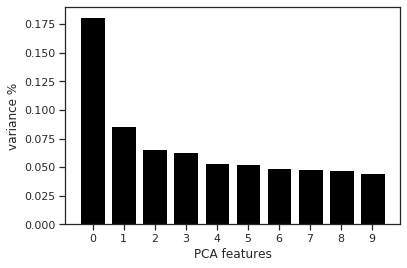

In [92]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(format_df)
# Create a PCA instance: pca
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

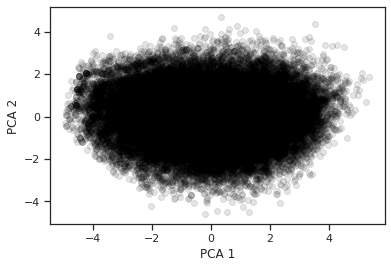

In [93]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

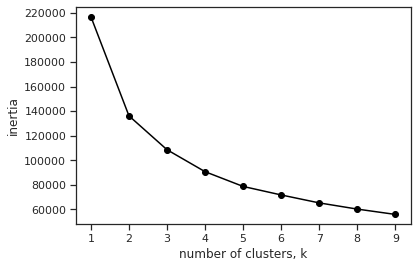

In [94]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [0]:
 import numpy as np 
 
 df_matrix = np.array(df.to_numpy())

In [21]:
df_matrix.shape

(22471, 29)

In [0]:
from sklearn.cluster import AffinityPropagation
clustering = AffinityPropagation().fit(df_matrix)

In [23]:
cluster_centers_indices = clustering.cluster_centers_indices_
labels = clustering.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 777


In [0]:
import pickle

pickle.dump(clustering.cluster_centers_,open("std_cluster_centers.dat","wb"))
pickle.dump(clustering.cluster_centers_indices_,open("std_cluster_centers_indices.dat","wb"))
pickle.dump(clustering.labels_,open("std_cluster_labels.dat","wb"))

In [25]:
len(clustering.labels_)

22471

In [0]:
kmean= KMeans(3)
kmean.fit(X_std)
labels=kmean.labels_

In [96]:
labels

array([1, 2, 2, ..., 2, 2, 2], dtype=int32)

In [97]:
format_df["clusters"] = labels
format_df.head()

,EW6,MH1A,HB3,HB7,HB6,FP2A,ED4,GR27A,GR22,HB1,AI1,COPC,METRO,EW16A,EW16C,EW9,NPERSONS,INCOMEPC,URBAN2011,EW10,clusters
0,4,0,1.0,4.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,0,0.0,0.0,4.0,9,2,0,5.0,1
1,2,1,1.0,3.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0,0.0,0.0,3.0,9,2,0,5.0,2
2,3,2,1.0,3.0,4.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,0,0.0,0.0,3.0,16,3,0,3.0,2
3,4,2,1.0,4.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0,0.0,0.0,5.0,7,2,0,3.0,1
4,4,2,1.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0.0,0.0,3.0,5,2,0,3.0,1


In [0]:
lookup = dict()
lookup['EW5'] = "Relationship to Household head"
lookup['EW6'] = "Age (in years)"
lookup['EW7Y'] = "Year of birth"
lookup['EW8'] = "Years of education completed"
lookup['EW9'] = "N children alive"
lookup['EW10'] = "Your general health"
lookup['EW13A'] = "Mother lives in household"
lookup['EW13B'] = "Father lives in household"
lookup['EW14A'] = "Mother attended school"
lookup['EW15A'] = "Mother education"
lookup['EW15B'] = "Father education"
lookup['EW16A'] = "Mother literate"
lookup['EW16B'] = "Father literate"
lookup['EW16C'] = "Mother-in-law literate"
lookup['EW18A'] = "Brother highest education"
lookup['EW18B'] = "Sister highest education"
lookup['HB1'] = "glasses of milk daily harmful during pregnancy"
lookup['HB2'] = "Belief: Men physically weak months after sterilization"
lookup['HB3'] = "Belief: 1st milk after birth good for baby"
lookup['HB4'] = "Belief: Chulha smoke good for health"
lookup['HB5'] = "Belief: Child diarrhea more to drink"
lookup['HB6'] = "Belief: Illness spread through impure water"
lookup['HB7'] = "Belief: How Malaria spreads"
lookup['HB8'] = "Belief: Pregnancy most likely during menstrual cycle"
lookup['AI1'] = "HIV-AIDS Awareness"
lookup['GR9F'] = "Can visit health centre alone (permission needed or not)"
lookup['GR13A'] = "Past 5 years: Been to metro city (beside current residence)"
lookup['GR16A'] = "Past 5 years: Been to another state"
lookup['GR17A'] = "Past 5 years: Been abroad"
lookup['GR18A'] = "Are you a member of a: Mahila Mandal"
lookup['GR18B'] = "Are you a member of a: Self-help group"
lookup['GR22'] = "Family outings to cinema, mela, or restaurant"
lookup['GR27A'] = "Family member has bank account"
lookup['MH1A'] = "Age at marriage (in years)"
lookup['MH1E'] = "Age first started menarche (in years)"
lookup['MH2'] = "Marriage status"
lookup['MH4A'] = "Who chose your husband"
lookup['MH4B'] = "Did you have any say in choosing your husband"
lookup['FP2A'] = "Currently use contraceptives"
lookup['URBAN2011'] = "Urban residence from census 2011"
lookup['METRO'] = "Largest 6 metro areas 0 or 1"
lookup['ID11'] = "Religion"
lookup['ID13'] = "Caste category"
lookup['COPC'] = "Household expenditure per capita"
lookup['INCOMEPC'] = "per capita income"
lookup['NPERSONS'] = "N in household"
lookup['ED2'] = "Education: Literacy"
lookup['ED4'] = "Education: Attended school"

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


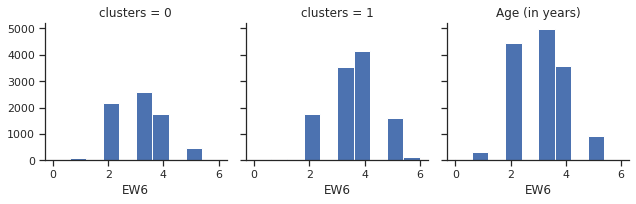

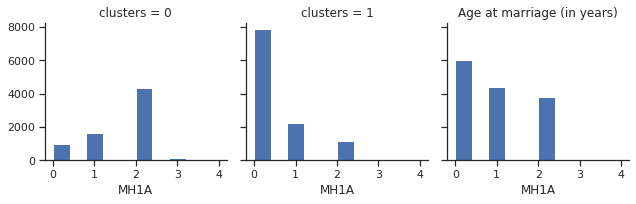

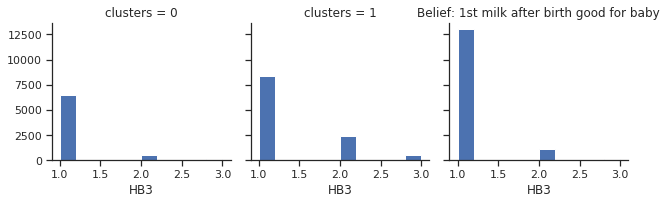

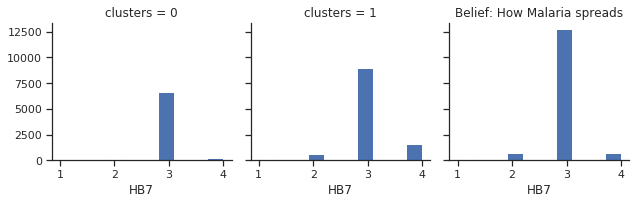

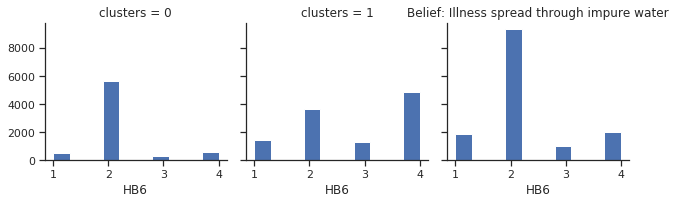

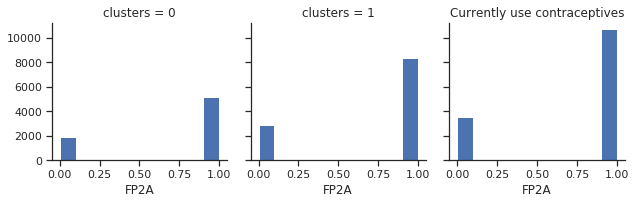

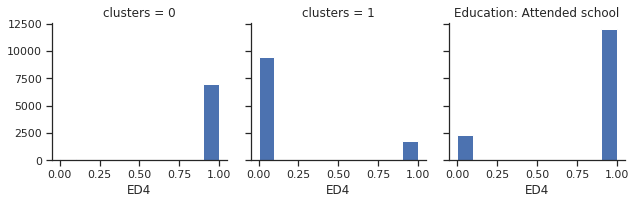

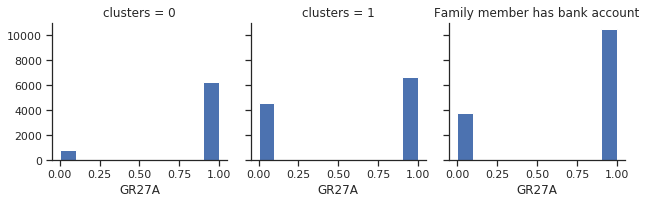

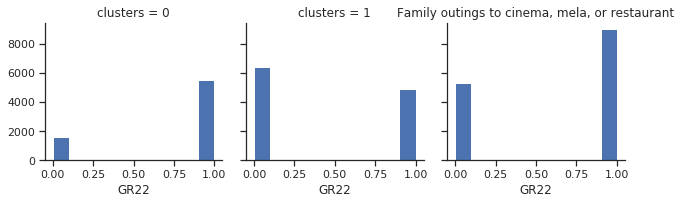

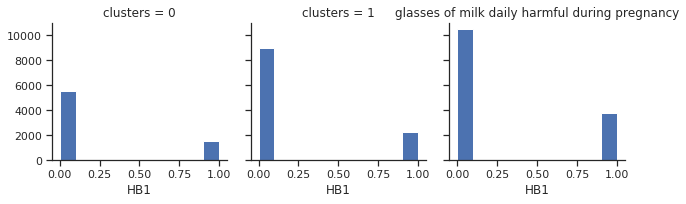

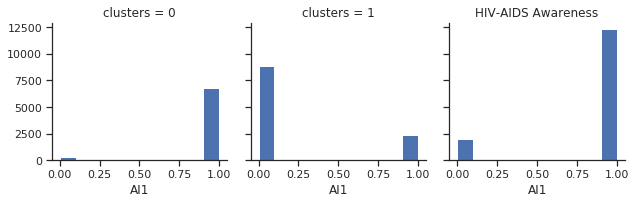

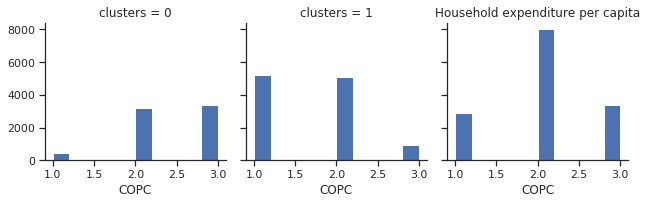

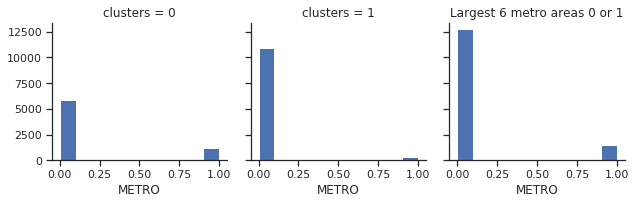

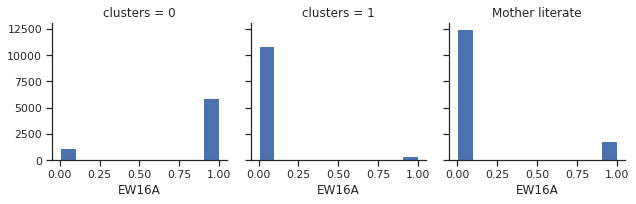

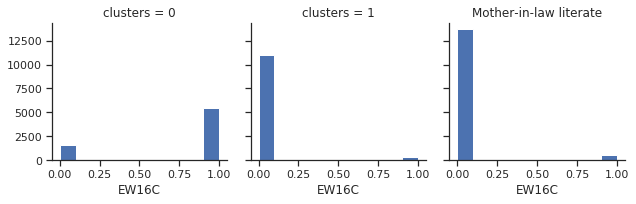

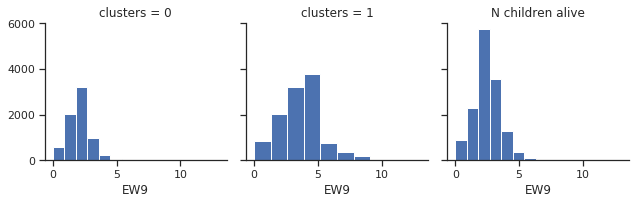

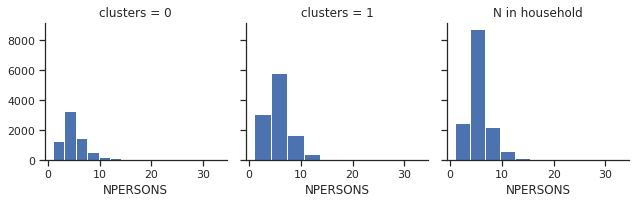

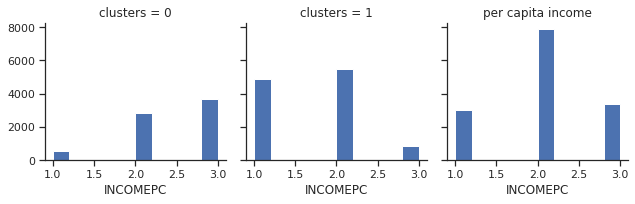

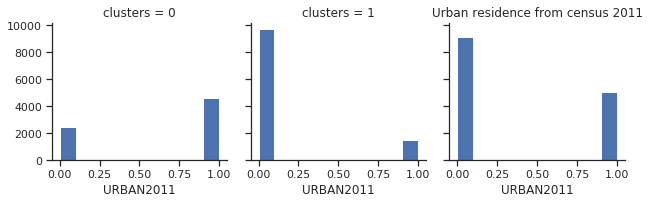

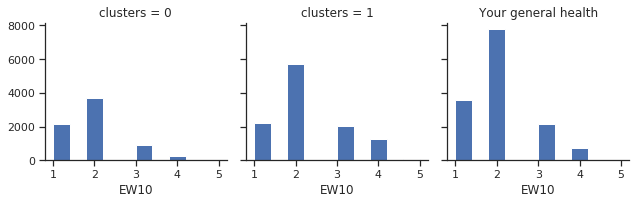

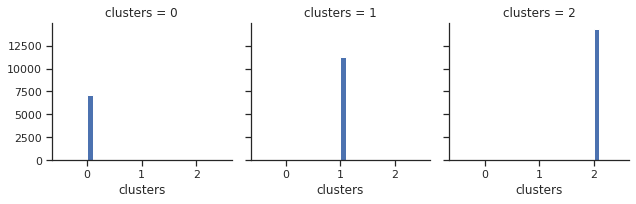

In [99]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="ticks")

for c in format_df:
    try:
      grid= sns.FacetGrid(format_df, col='clusters')
      grid.map(plt.hist, c)
      plt.title(lookup[c])
      name = "img_" + lookup[c]
      plt.savefig(name)
    except:
      continue

In [102]:
dist = 1 - cosine_similarity(X_std)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(32596, 2)

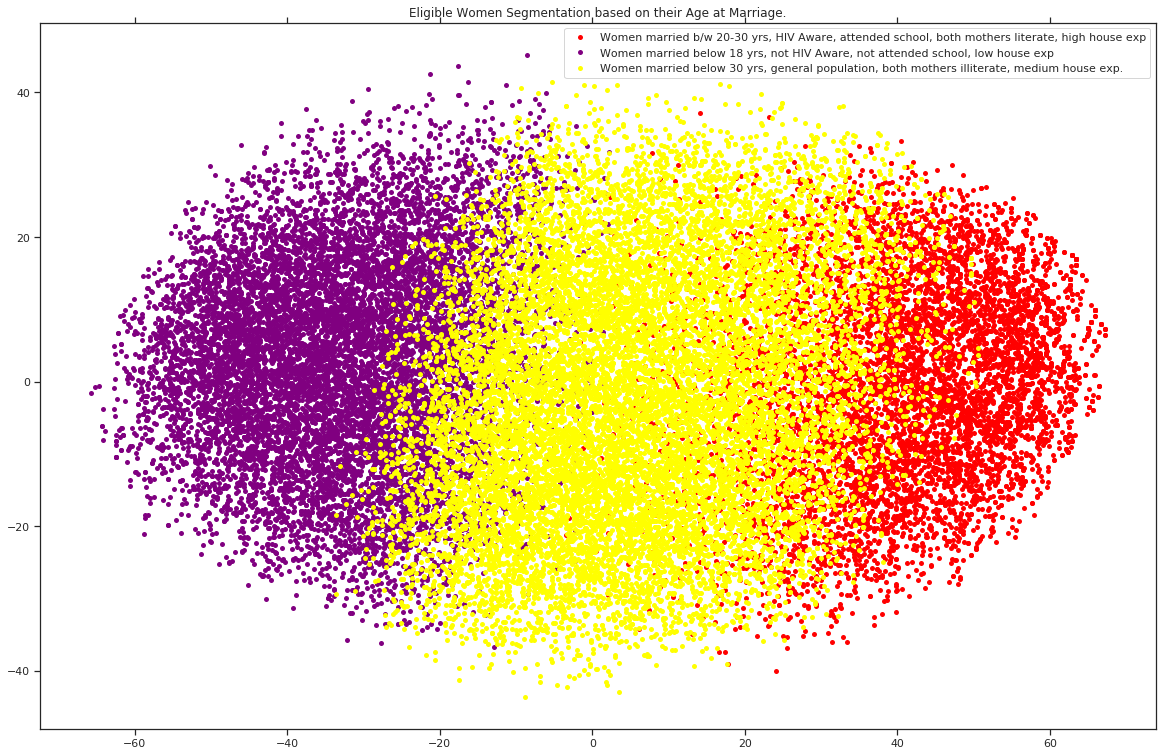

In [103]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'purple',
          2: 'yellow', }

names = {0: 'Women married b/w 20-30 yrs, HIV Aware, attended school, both mothers literate, high house exp', 
         1: 'Women married below 18 yrs, not HIV Aware, not attended school, low house exp', 
         2: 'Women married below 30 yrs, general population, both mothers illiterate, medium house exp.', }
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Eligible Women Segmentation based on their Age at Marriage.")
plt.show()
